In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as da
import matplotlib as mtplt
import matplotlib.pyplot as plt
from scipy.stats import norm
import yfinance as yf
import datetime


In [2]:
ticker=['INFY.NS']
data = pd.DataFrame()
data = da.DataReader(ticker, data_source = 'yahoo' , start='2020-7-1')['Adj Close']

In [3]:
data.head

<bound method NDFrame.head of Symbols         INFY.NS
Date                   
2020-07-01   716.390503
2020-07-02   740.567078
2020-07-03   746.537842
2020-07-06   747.810242
2020-07-07   777.321411
...                 ...
2021-09-06  1730.400024
2021-09-07  1706.650024
2021-09-08  1693.250000
2021-09-09  1691.599976
2021-09-13  1699.500000

[300 rows x 1 columns]>

In [4]:
data.head
data.dropna()

Symbols,INFY.NS
Date,
2020-07-01,716.390503
2020-07-02,740.567078
2020-07-03,746.537842
2020-07-06,747.810242
2020-07-07,777.321411
...,...
2021-09-06,1730.400024
2021-09-07,1706.650024
2021-09-08,1693.250000


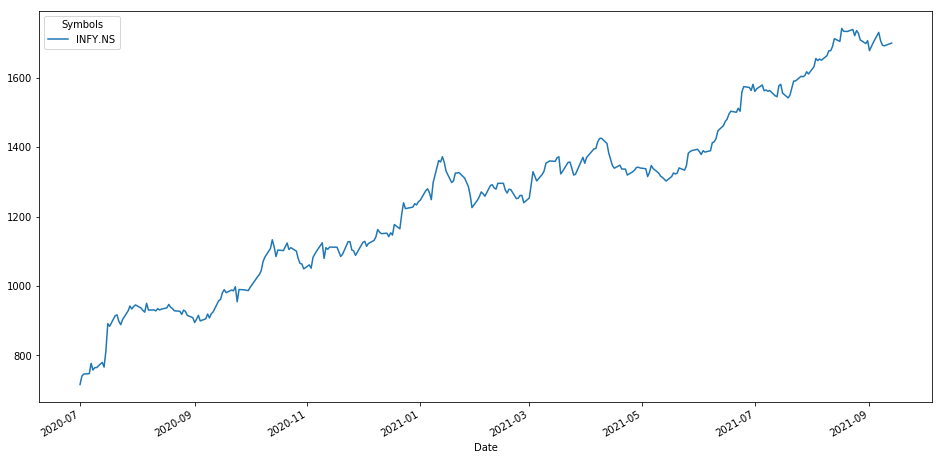

In [5]:
data.plot(figsize=(16,8))

In [6]:
from statsmodels.tsa.stattools import adfuller

In [7]:
#to Comment on stationarity of graph we need to perform ADFULLER test
#creating a function which runs ADFUller test on dataset
#adfuller test will return array of different values: ADF,p-value, number of lags etc
def ADF(dataset):
    ADFtest= adfuller(dataset, autolag='AIC')
    print("ADF value",ADFtest[0])
    print("p value",ADFtest[1])
    print("number of lags", ADFtest[2])
    print("number of obesrvations", ADFtest[3])
    
#p-value is most important...the less the value themore graph is stationary: ideally it should beless than 0.05

In [8]:
ADF(data)

ADF value -1.1870357928996427
p value 0.679147576254457
number of lags 0
number of obesrvations 299


In [9]:
data= np.log(data)

In [10]:
from pmdarima import auto_arima

In [11]:
import warnings
warnings.filterwarnings("ignore")

In [12]:
x=len(data)
x=x-15
train=data[:x]
test=data[x:]
x

285

In [13]:
findbest= auto_arima(train,trace=True,suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1549.710, Time=0.60 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1553.081, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1551.203, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1551.212, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1544.014, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1550.478, Time=0.12 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.974 seconds


In [14]:
findbest.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  285
Model:               SARIMAX(0, 1, 0)   Log Likelihood                 778.540
Date:                Mon, 13 Sep 2021   AIC                          -1553.081
Time:                        14:01:06   BIC                          -1545.783
Sample:                             0   HQIC                         -1550.155
                                - 285                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0031      0.001      3.137      0.002       0.001       0.005
sigma2         0.0002   1.28e-05     19.059      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.12   Jarque-Bera (JB):               212.22
Prob(Q):                              0.73   Prob(JB):                         0.00
Heteroskedasticity (H):               0.27   Skew:                             0.87
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.86
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [15]:
from statsmodels.tsa.arima_model import ARIMA

In [16]:
train.shape,test.shape

((285, 1), (15, 1))

In [17]:
model = ARIMA(train,order=(0,2,0))
model=model.fit()

In [18]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:             D2.INFY.NS   No. Observations:                  283
Model:                 ARIMA(0, 2, 0)   Log Likelihood                 681.132
Method:                           css   S.D. of innovations              0.022
Date:                Mon, 13 Sep 2021   AIC                          -1358.263
Time:                        14:01:06   BIC                          -1350.972
Sample:                             2   HQIC                         -1355.340
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0001      0.001     -0.091      0.927      -0.003       0.002
==============================================================================
"""

In [19]:
pred=model.predict(start=len(train),end=(len(train)+len(test)-1),typ='levels')

In [20]:
pred.index=test.index

In [21]:
pred

Date
2021-08-23    7.457174
2021-08-24    7.456649
2021-08-25    7.456005
2021-08-26    7.455243
2021-08-27    7.454363
2021-08-30    7.453365
2021-08-31    7.452249
2021-09-01    7.451014
2021-09-02    7.449660
2021-09-03    7.448189
2021-09-06    7.446599
2021-09-07    7.444891
2021-09-08    7.443065
2021-09-09    7.441120
2021-09-13    7.439057
dtype: float64

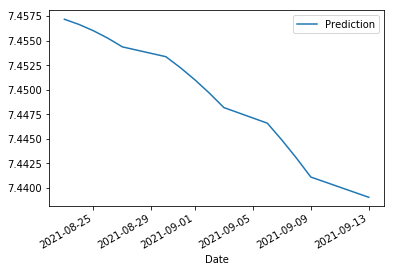

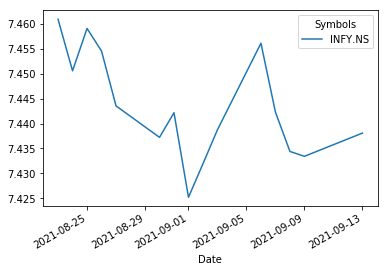

In [22]:
pred.plot(legend=True,label='Prediction')
test.plot(legend=True,label='Actual Price')

In [23]:
from sklearn.metrics import mean_squared_error
from math import sqrt


In [24]:
rmse=sqrt(mean_squared_error(pred,test))


In [25]:
rmse

0.011076027646060825